In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set()
sns.husl_palette(10, s=.4)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.simplefilter('ignore')

pd.options.display.max_rows=100
pd.options.display.max_columns=250
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'family': 'Calibri'}
label_dict = {'fontsize': '14', 'family': 'Calibri'}

In [2]:
Subscribers_PATH = 'Subscribers.csv'
data = pd.read_csv(Subscribers_PATH)

In [3]:
mutual_PATH = 'mutual.csv'
mutual = pd.read_csv(mutual_PATH)

# Задача 1. Выявление наиболее влиятельных и популярных пользователей Instagram

## Гипотеза 1. Наиболее влиятельные и популярные пользователи соцсети имеют большое количество невзаимных подписок, лайков и комментариев.  Количество подписчиков и число лайков растет со временем.

In [4]:
qnt_of_followers = data.groupby('username')['follower_name'].count()
qnt_of_mutual = mutual.groupby('username')['follower_name'].count()
data = data.merge(qnt_of_followers, on='username', how='left')
data = data.merge(qnt_of_mutual, on='username', how='left')

In [5]:
data.dropna(0, inplace=True)

In [6]:
data.rename(columns={'follower_name_x': 'follower_name', 
                     'follower_name_y': 'qnt_followers', 
                     'follower_name': 'mutual'}, inplace=True)

In [7]:
data.mutual = data.mutual.astype('int')

In [8]:
data['difference'] = data['qnt_followers'] - data['mutual']

In [9]:
data.head(15)

,username,follower_name,qnt_followers,mutual,difference
22,trollnuggetsvihiculardevices,candrews.art,1,1,0
23,danbilzerian,candrews.art,30,2,28
33,kozhevennaya_lavka_krd,ewita52___dolls,3,3,0
37,crackerman15,seeingtravis,1,1,0
39,seeingtravis,crackerman15,38,14,24
40,mr_chernetsov,zakon232018,2,1,1
41,ar5em_lazarev,livturizm258,1,1,0
42,chrislowe_ra,seeingtravis,1,1,0
45,seeingtravis,chakaconner,38,14,24
47,alex92xs,livturizm258,2,1,1


In [10]:
most_popular_users = data.groupby('username')['difference'].max().sort_values(ascending=False)

In [11]:
most_popular_users.count()

68105

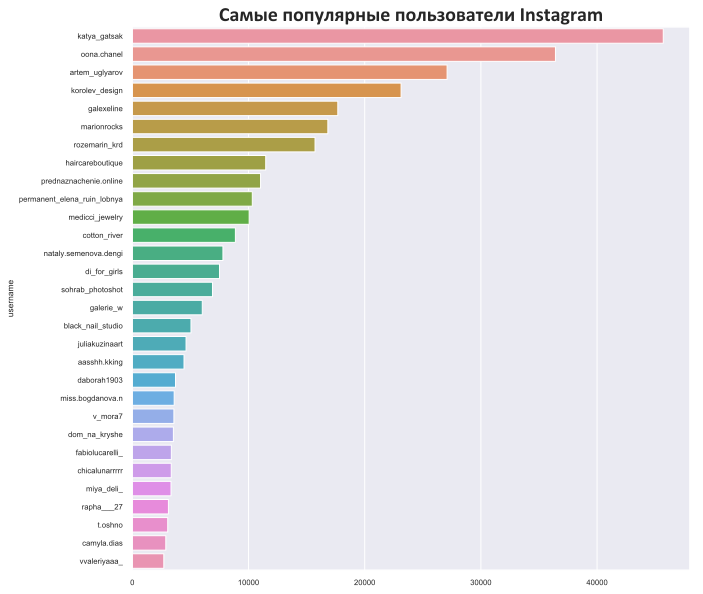

In [12]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.7)
sns.barplot(y=most_popular_users.index[:30], x=most_popular_users.values[:30])
plt.title('Самые популярные пользователи Instagram', fontdict=title_dict);

### Проблема 1. Нужно отслеживать прирост подписчиков, постов и лайков во времени. Нужны временные метки.

## Гипотеза 2. Динамика прироста накрученных подписчиков или лайков отличается от настоящих. Существуют резкие скачки прироста купленных подписчиков или лайков, заметные на графике. Причем резкий прирост отличается систематичностью и не снижается в ночное время.

In [13]:
dti = pd.date_range('2018-01-01', periods=30, freq='D')

In [14]:
true = pd.Series([i for i in range(30, 0, -1)], index=dti)

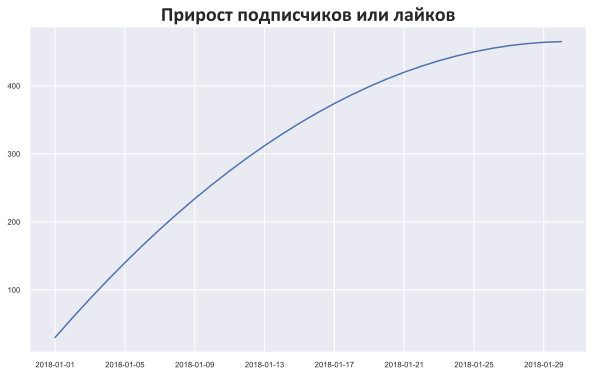

In [15]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.7)
plt.plot(true.cumsum())
plt.title('Прирост подписчиков или лайков', fontdict=title_dict);

In [16]:
fake = pd.Series([30, 29, 28, 27, 26, 25, 24, 23, 
                        1000, 1000, 20, 19, 18, 17, 16, 15, 
                        14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], index=dti)

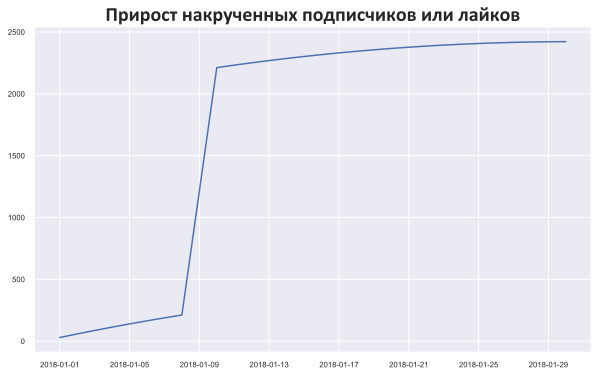

In [17]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.7)
plt.plot(fake.cumsum())
plt.title('Прирост накрученных подписчиков или лайков', fontdict=title_dict);

In [18]:
day = pd.date_range('2018-01-07', periods=48+48, freq='H')

In [19]:
fake_d = pd.Series([i for i in range(48+48, 0, -1)], index=day)

In [20]:
fake_d['2018-01-08': '2018-01-09'] = 500

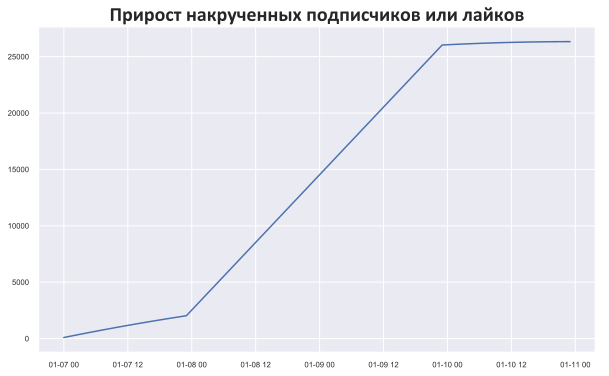

In [21]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.7)
plt.plot(fake_d.cumsum())
plt.title('Прирост накрученных подписчиков или лайков', fontdict=title_dict);

### Гипотеза 3. БОльшая часть прироста лайков приходится на первые сутки публикации. Фейковые лайки могут относится к старым публикациям.

# Задача 2. Сегментирование пользователей Instagram

### Гипотеза 3. Для сегментации по социально-экономическим признакам (образование, занятость, доход) 

Количество публикаций в месяц = число публикаций / количество месяцев существования аккаунта

Созданный конетент = количество слов в публикации / число публикаций

Рост количества подписчиков

Число обращений = количество людей, которые просмотрели или лайкнули пост (возможно в течение какого-то времени)

Интенсивность беседы = число комментариев посетителей / количество публикаций

Репосты (авторитет) = количество репостов на тысячу подписчиков за последнюю неделю

Среднее количество комментариев за месяц (ведете ли вы диалог)

Насколько влиятельны те, кто комментирует или репостит ваши посты

Активность = количество подписчиков / количество постов